In [6]:
%load_ext autoreload

%autoreload 2

import glob
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

import timelapse_analysis as ta

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Previous issues: image width too wide; need to crop.

# 2018-05-29 Levain Timelapse - Double

In [58]:
@interact(index=widgets.IntSlider(min=0,max=109,step=1,value=10))
def view_frame(index):
    fnames = glob.glob('2018-05-29 Levain Timelapse/*.jpg')
    ta.test_image(fnames[index], crop_area=[100, 975, 300, 700], min_area=20000);

interactive(children=(IntSlider(value=10, description='index', max=109), Output()), _dom_classes=('widget-interact',))

386 875


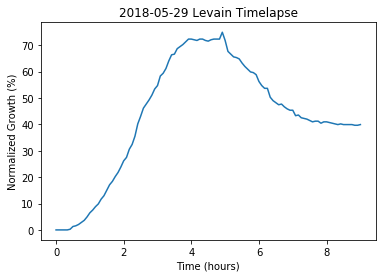

In [63]:
df_529left = ta.analyze_image('2018-05-29 Levain Timelapse', crop_area=[100, 975, 300, 700], min_area=20000)

## Right Jar

In [61]:
@interact(index=widgets.IntSlider(min=0,max=109,step=1,value=10))
def view_frame(index):
    fnames = glob.glob('2018-05-29 Levain Timelapse/*.jpg')
    ta.test_image(fnames[index], crop_area=[100, 990, 950, 1050], min_area=20000);

interactive(children=(IntSlider(value=10, description='index', max=109), Output()), _dom_classes=('widget-interact',))

308 890


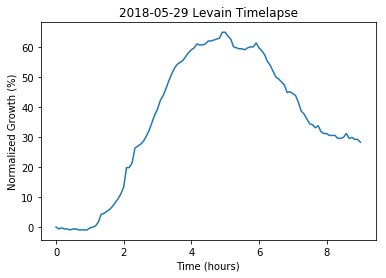

In [64]:
df_529right = ta.analyze_image('2018-05-29 Levain Timelapse', crop_area=[100, 990, 950, 1050], min_area=20000)

# 2018-05-31 Levain Timelapse - First Feeding

In [62]:
@interact(index=widgets.IntSlider(min=0,max=95,step=1,value=10))
def view_frame(index):
    fnames = glob.glob('2018-05-31 Levain Timelapse/*.jpg')
    ta.test_image(fnames[index], crop_area=[0, 1100, 650, 900]);


interactive(children=(IntSlider(value=10, description='index', max=95), Output()), _dom_classes=('widget-interact',))

2018-05-31 Levain Timelapse.json loaded.


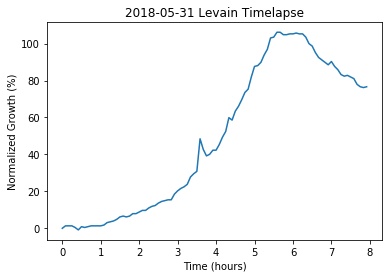

In [65]:
df_531 = ta.analyze_image('2018-05-31 Levain Timelapse', crop_area=[0, 1100, 650, 900])

# 2018-05-31 Levain Timelapse 2 - Second Feeding

In [53]:
@interact(index=widgets.IntSlider(min=0,max=85,step=1,value=10))
def view_frame(index):
    fnames = glob.glob('2018-05-31 Levain Timelapse 2/*.jpg')
    ta.test_image(fnames[index], crop_area=[100, 900, 440, 515], min_area=10000);


interactive(children=(IntSlider(value=10, description='index', max=85), Output()), _dom_classes=('widget-interact',))

213 800


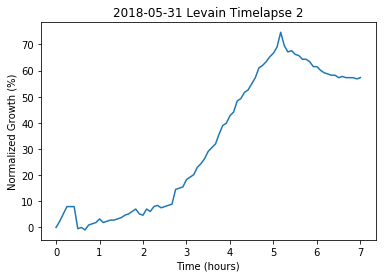

In [54]:
df_531_2 = ta.analyze_image('2018-05-31 Levain Timelapse 2', [100, 900, 440, 515], min_area=10000)

# Comparison
df_529left
df_529right
df_531
df_531_2

Text(0.5,1,'Levain Growth Over Time')

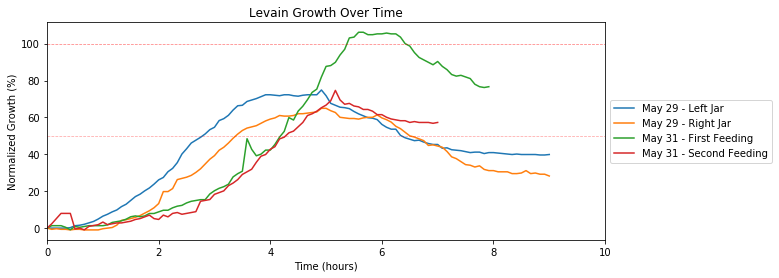

In [82]:
def plot_heights(ax, df, label):
    ax.plot(df['Time']/60, df['Height Normalized']*100, label=label)
    
fig, ax = plt.subplots(1, figsize=(10,4))

plot_heights(ax, df_529left, 'May 29 - Left Jar')
plot_heights(ax, df_529right, 'May 29 - Right Jar')
plot_heights(ax, df_531, 'May 31 - First Feeding')
plot_heights(ax, df_531_2, 'May 31 - Second Feeding')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Normalized Growth (%)')

ax.axhline(y=100, color='r', linestyle='--', alpha=0.5, linewidth=0.75)
ax.axhline(y=50, color='r', linestyle='--', alpha=0.35, linewidth=0.75)

ax.set_xlim([0, 10])
ax.set_title('Levain Growth Over Time')